# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is linear because the prediction is a linear combination of its paramters (coefficients), regardless of whether the input variables themselves are transformed nonlinearly. Essentially it's linear in the parameters. 
2. For a dummy variable with an intercept, the coefficient for the dummy tells you the difference between the group represented by the dummy and the reference. If an intercept is included, you must drop a category to avoid perfect multicollinearity.  The coefficient is then interpreted relative to the dropped reference category. 
3. A linear regression can be used for classification for the linear probability model. But, linear regressoin is not generally ideal for most classification tasks during decision boundary, error structure, and interpretation of outputs. In the interpretation of ouputs, linear regression makes the predicted values continuous and unboanded which mean they can fall below 0 or above 1. For classification we want probabilities that lie between 0 and 1. Classification is not recommended because it doesn't natrually handle the binary nature of the data, and may produce predictions that don't represent valid probabilities. 
4. Some signs include excessively large coeeficients, high variance, and poor cross-validation. If the model fails to generalize new data, or relies on unstable large coefficients, there are signs of overfitting. 
5. The two-stage least squares technique is used to correct endogeneity by isolating the variation in an endogeneous variable that is uncorrelated with the error term. The first stage regresses the endogeneous variable on all the instruments to get a 'clean' fitted value. The second stage uses fitted values as predictors in the main regression. Multicollinearity in the context of two-stage least squares, can undermine the effectiveness by making the first stage imprecise. When the predictors are hihgly correlated and colinear, it becomes difficult to pin down the individual effect of each predictor on the endogenous variable. 
6. You can transform predictors to capture nonlinear relationships so that the model remains linear in the parameters but can represent complex patterns. There are various transformatoins including variable transformations, polynomial terms, interaction terms, and piecewise regressions. This can still effectively model a wide range of nonlinear relationships between y and x. 
7. The intercept is the expected value of the outcome variable when all predictors are set to zero. It is the baseline level of y for the reference point where every x equals zero.  Its interpretation depends on whether the value zero is meaningful for your predictors. The slope coefficient represents the change in predicted value of y for one-unit increase in $x_1$, holding all other variables constant. It is the marginal effect of $x_1$ on $y$. The coefficient for a dummy/one-hot-encoded variable indicates the difference in the predicted outcome between the group represetned by the dummy and the reference group. It shows how much higher or lower the outcome is expected to be for the dummy group compared to the base group.  

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

Average Price and Review Scores by Neighbourhood:
  Neighbourhood        Price  Review Scores Rating
0          Bronx   75.276498             91.654378
1       Brooklyn  127.747378             92.363497
2      Manhattan  183.664286             91.801496
3         Queens   96.857233             91.549057
4  Staten Island  146.166667             90.843750

The most expensive borough on average is: Manhattan


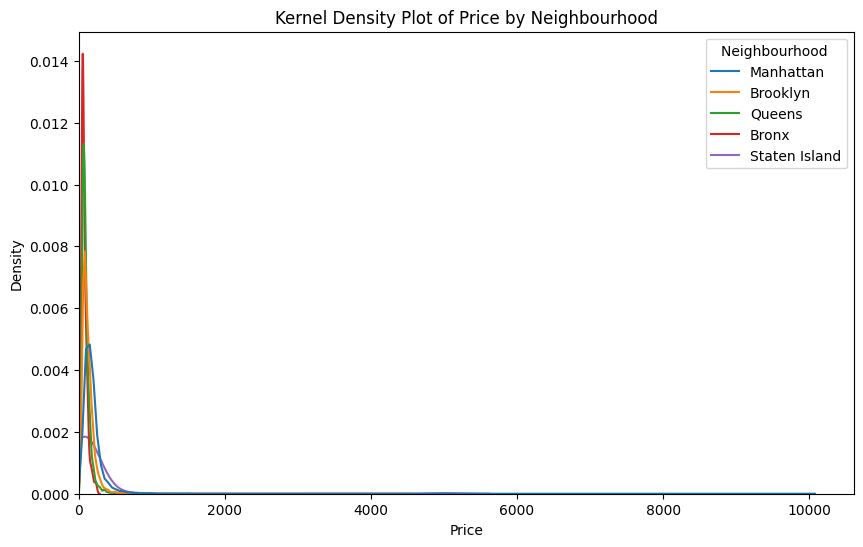

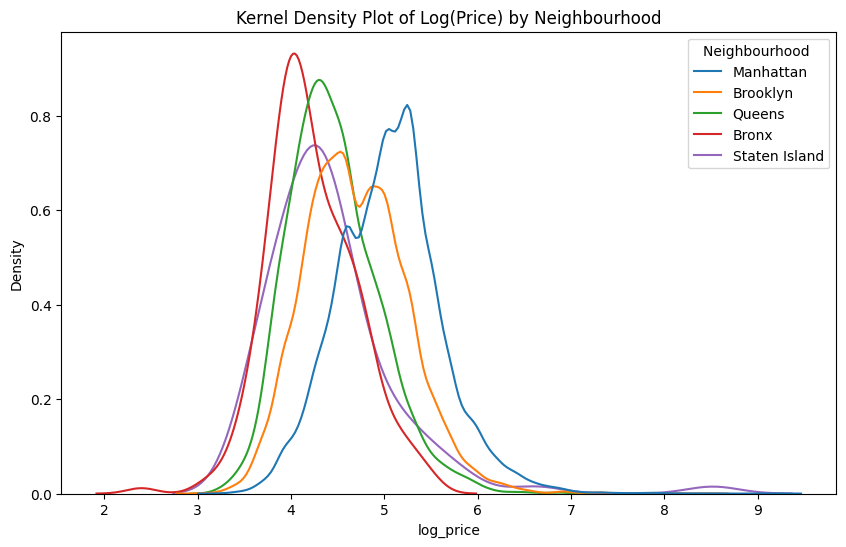

In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/kimberlyliu/Downloads/DS 3001/linearModels/assignment/data/Q1_clean.csv')

grouped = df.groupby('Neighbourhood ', as_index=False).agg({
    'Price': 'mean',
    'Review Scores Rating': 'mean'
})

print("Average Price and Review Scores by Neighbourhood:")
print(grouped)

# Identify which borough is the most expensive on average
most_expensive = grouped.loc[grouped['Price'].idxmax(), 'Neighbourhood ']
print(f"\nThe most expensive borough on average is: {most_expensive}")

# Create a kernel density plot of Price by Neighbourhood 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlim(0, None)  # Helps focus on the positive range
plt.show()

# Create a kernel density plot of log(Price) by Neighbourhood 
df['log_price'] = np.log(df['Price'] + 1)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='log_price', hue='Neighbourhood ', common_norm=False)
plt.title('Kernel Density Plot of Log(Price) by Neighbourhood')
plt.show()

In [ ]:
# Compute group means by Neighbourhood 
group_means = df.groupby('Neighbourhood ')['Price'].mean().reset_index()
print("Average Price by Neighbourhood:")
print(group_means)

# Create dummy variables for Neighbourhood without dropping any category.
dummies = pd.get_dummies(df['Neighbourhood '], prefix='Neighbourhood', drop_first=False)

# Regress Price on these dummies WITHOUT an intercept.
model = sm.OLS(df['Price'], dummies).fit()

# Print the regression summary
print("\nRegression Output:")
print(model.summary())

coefficients = model.params.reset_index()
coefficients.columns = ['Neighbourhood', 'Estimated Mean Price']

coefficients['Neighbourhood'] = coefficients['Neighbourhood'].str.replace('Neighbourhood_', '')
print("\nCoefficients from the regression (group means):")
print(coefficients)

Average Price by Neighbourhood (from grouping):
  Neighbourhood        Price
0          Bronx   75.276498
1       Brooklyn  127.747378
2      Manhattan  183.664286
3         Queens   96.857233
4  Staten Island  146.166667

Regression Output:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        16:21:44   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust          

Each coefficient in the no-intercept model matches the mean price for its respective neighborhood. For example, the Brooklyn coefficient of 127.75 matches the Brooklyn mean price. This happens because regression on a continuous variable (price) on a categorical variable (neighborhood), the category's coefficient directly estimates the mean of the outcome for that category. 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the data
df = pd.read_csv('./data/Q1_clean.csv')

# Create dummy variables for Neighbourhood, dropping one category for the intercept model.
dummies = pd.get_dummies(df['Neighbourhood '], prefix='Neighbourhood', drop_first=True)

# Convert boolean dummies to integers (0 and 1)
dummies = dummies.astype(int)

# Combine predictors: add constant (intercept) and the dummy variables
X = sm.add_constant(dummies)
y = df['Price']

# Fit the OLS model
model_with_intercept = sm.OLS(y, X).fit()

# Print the model summary
print(model_with_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        16:35:27   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In this version, we had to handle the dummy creation by dropping one category. In this case, Bronx was dropped, making it the reference category. The intercept is the mean price for the reference category at 75.28. Each dummy variable's coefficient tells me how much higher or lower the mean price is for the neighhborhood. For example, Brooklyn's average price is 52.59 higher than Bronx's avergage. So, Brooklyn's mean price is 127.57. From these new coefficients, each coefficient is directly equaled the mean price of that neighborhood. With an intercept, the dropped category becomes the baseline, and each dummy coefficient is the difference from that baseline. Without an intercept, each category's coefficient is its mean, but you must include a dummy for every category (leading to no baseline). Both approaches capture the same information – just encoded differently. 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./data/Q1_clean.csv')

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_neigh_dummies = pd.get_dummies(train_df['Neighbourhood '],
                                     prefix='Neigh',
                                     drop_first=True)
test_neigh_dummies = pd.get_dummies(test_df['Neighbourhood '],
                                    prefix='Neigh',
                                    drop_first=True)

test_neigh_dummies = test_neigh_dummies.reindex(columns=train_neigh_dummies.columns,
                                                fill_value=0)

X_train = pd.concat([train_df['Review Scores Rating'], train_neigh_dummies], axis=1)
y_train = train_df['Price']

X_test = pd.concat([test_df['Review Scores Rating'], test_neigh_dummies], axis=1)
y_test = test_df['Price']

X_train = X_train.astype(int)
X_train = sm.add_constant(X_train)

X_test = X_test.astype(int)
X_test = sm.add_constant(X_test, has_constant='add')

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Predict on the test set
y_pred = model.predict(X_test)

# Compute R^2 on the test set
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_test = 1 - ss_res/ss_tot

# Compute RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R^2: {r2_test:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")

# Extract the coefficient on 'Review Scores Rating'
coef_review_scores = model.params['Review Scores Rating']
print(f"Coefficient on Review Scores Rating: {coef_review_scores:.3f}")

# Find the most expensive property type
avg_price_by_property = df.groupby('Property Type')['Price'].mean().sort_values(ascending=False)
most_expensive_property = avg_price_by_property.index[0]
print("\nAverage price by Property Type:")
print(avg_price_by_property)
print(f"\nThe most expensive property type is: {most_expensive_property}")

mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print("Test RMSE:", rmse_test)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          1.33e-197
Time:                        16:55:52   Log-Likelihood:            -1.1348e+05
No. Observations:               17722   AIC:                         2.270e+05
Df Residuals:                   17716   BIC:                         2.270e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -35.1573 

The R-sqaure on the test set is 0.051. The RMSE is 140.9. The coefficient on Review Scores Rating is 1.21. The most expensive property type is Condo 

In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('./data/Q1_clean.csv')

# Split the sample 80/20 into train and test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


train_neigh_dummies = pd.get_dummies(train_df['Neighbourhood '],
                                     prefix='Neigh', drop_first=True)
train_prop_dummies = pd.get_dummies(train_df['Property Type'],
                                    prefix='Prop', drop_first=True)

test_neigh_dummies = pd.get_dummies(test_df['Neighbourhood '],
                                    prefix='Neigh', drop_first=True)
test_prop_dummies = pd.get_dummies(test_df['Property Type'],
                                   prefix='Prop', drop_first=True)

test_neigh_dummies = test_neigh_dummies.reindex(columns=train_neigh_dummies.columns, fill_value=0)
test_prop_dummies  = test_prop_dummies.reindex(columns=train_prop_dummies.columns, fill_value=0)

# Combine the features: Review Scores Rating, Neighbourhood dummies, Property dummies
X_train = pd.concat([
    train_df['Review Scores Rating'], 
    train_neigh_dummies, 
    train_prop_dummies
], axis=1)
y_train = train_df['Price']

X_test = pd.concat([
    test_df['Review Scores Rating'], 
    test_neigh_dummies, 
    test_prop_dummies
], axis=1)
y_test = test_df['Price']

X_train = X_train.astype(int)
X_train = sm.add_constant(X_train)

X_test = X_test.astype(int)
X_test = sm.add_constant(X_test, has_constant='add')

model = sm.OLS(y_train, X_train).fit()
print(model.summary())

#  Predict on the test set
y_pred = model.predict(X_test)

# Compute R^2 and RMSE on the test set
ss_res = np.sum((y_test - y_pred)**2)
ss_tot = np.sum((y_test - np.mean(y_test))**2)
r2_test = 1 - ss_res/ss_tot
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nTest R^2: {r2_test:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")

# Coefficient on Review Scores Rating
coef_review_scores = model.params['Review Scores Rating']
print(f"Coefficient on Review Scores Rating: {coef_review_scores:.3f}")

prop_cols = [c for c in model.params.index if c.startswith('Prop_')]
intercept = model.params['const']

# Compute the implied baseline price for the reference property type:
ref_property_name = 'the dropped category (see drop_first)' 
ref_property_price = intercept

print("\nReference property type's baseline price (at rating=0, reference neighbourhood): "
      f"{ref_property_price:.2f} [Type: {ref_property_name}]")

implied_prices = {}
for c in prop_cols:
    implied_prices[c] = intercept + model.params[c]

sorted_implied_prices = sorted(implied_prices.items(), key=lambda x: x[1], reverse=True)

print("\nImplied baseline prices by property type (rating=0, reference neighbourhood):")
for prop, val in sorted_implied_prices:
    prop_type = prop.replace('Prop_', '')
    print(f"{prop_type}: {val:.2f}")

most_expensive_prop, highest_val = sorted_implied_prices[0]
most_expensive_prop_type = most_expensive_prop.replace('Prop_', '')

print(f"\nBased on the regression, the most expensive property type at rating=0, "
      f"reference neighbourhood is: {most_expensive_prop_type}")

print("Test RMSE:", rmse_test)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.46
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          2.52e-218
Time:                        16:59:43   Log-Likelihood:            -1.1339e+05
No. Observations:               17722   AIC:                         2.268e+05
Df Residuals:                   17699   BIC:                         2.270e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -49.2960 

The R-squared is 0.060. The RMSE is 140.30. The most expensive property type is a Bungalow. The coefficient on the review scores rating is 1.201 

The coefficient changed by 0.01. This change indicates that some of the variation in Price was attributed to Review Scores Rating in the simpler model. Because Property Type is correlated with Price, adding it to the model helps to isloate the 'pure' effect of Review Scores Rating. The change in the coefficient shows that the omitted variable was partly cofounding the relationship between Review Scores Rating and Price. 

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [ ]:
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/linearModels/assignment/data/heart_hw.csv")

# Split the data into control and treatment groups
control = df[df['transplant'] == 'control']
treatment = df[df['transplant'] == 'treatment']

## QUESTION 1 
# (a) Compute the proportion of survivors in the control group
prop_control = control['y'].mean()
# (b) Compute the proportion of survivors in the treatment group
prop_treatment = treatment['y'].mean()
# Calculate the average treatment effect (ATE)
ate = prop_treatment - prop_control

print("Proportion of survivors in control group:", prop_control)
print("Average Treatment Effect (difference in proportions):", ate)

Proportion of survivors in control group: 0.11764705882352941
Average Treatment Effect (difference in proportions): 0.23017902813299232


In [7]:
import statsmodels.api as sm

# Create a dummy variable: 1 if transplant is "treatment", 0 if "control"
df['transplant_dummy'] = (df['transplant'] == 'treatment').astype(int)

# Define the independent variable (with a constant) and the dependent variable
X = sm.add_constant(df['transplant_dummy'])  # adds the intercept
y = df['y']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Sun, 23 Mar 2025   Prob (F-statistic):             0.0133
Time:                        15:42:16   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1176      0.075  

Comparing this output to my numbers from part 1, they match exactly. The intercept in my output is 0.1176 and the coefficient on the transplant_dummy vairable is 0.230. This is because in a linear regression of y on the transplant indicator, the intercept represents the mean outcome when the indicator is 0. Since the control group is 0, the intercept equals the avg survival rate in the control group. The coefficient on the tranplant dummy is the difference between the treatment group's avg survival and the control group's avg survival. The differce is the average treatment effect. 

In [ ]:
# Define independent variables: transplant_dummy and age
X = df[['transplant_dummy', 'age']]

# Add a constant to capture the intercept
X = sm.add_constant(X)

# Define the dependent variable
y = df['y']

# Fit the model
model_with_age = sm.OLS(y, X).fit()

print(model_with_age.summary())

# Print the specific coefficients for clarity
print("\nCoefficients:")
print("Intercept:", model_with_age.params['const'])
print("Coefficient on transplant_dummy:", model_with_age.params['transplant_dummy'])
print("Coefficient on age:", model_with_age.params['age'])


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           0.000357
Time:                        15:44:45   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7020      0.196  

When age was added to the model, the intercept no longer represents the overall mean survival rate of the control group. Now it became the predicted survival probability for a control-group pateint at age 0. Without age, the intercept was about 0.1176. With age, the intercept is 0.702, which reflects a hypothetical 0-year-old in the control group. 

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Add a squared term for age
df['age_sq'] = df['age'] ** 2

# Interactions: transplant × age and transplant × age_sq
df['transplant_age'] = df['transplant_dummy'] * df['age']
df['transplant_age_sq'] = df['transplant_dummy'] * df['age_sq']

# train-test split
# Define features (X) and outcome (y)
X = df[['transplant_dummy', 'age', 'age_sq', 'transplant_age', 'transplant_age_sq']]
y = df['y']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add an intercept (constant) term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test, has_constant='add')

# Fit OLS regression on training set
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

# Predict on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = np.mean((y_pred - y_test)**2)
print(f"Mean Squared Error on test set: {mse:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.991
Date:                Sun, 23 Mar 2025   Prob (F-statistic):             0.0162
Time:                        15:54:12   Log-Likelihood:                -41.009
No. Observations:                  82   AIC:                             94.02
Df Residuals:                      76   BIC:                             108.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1995      0.56

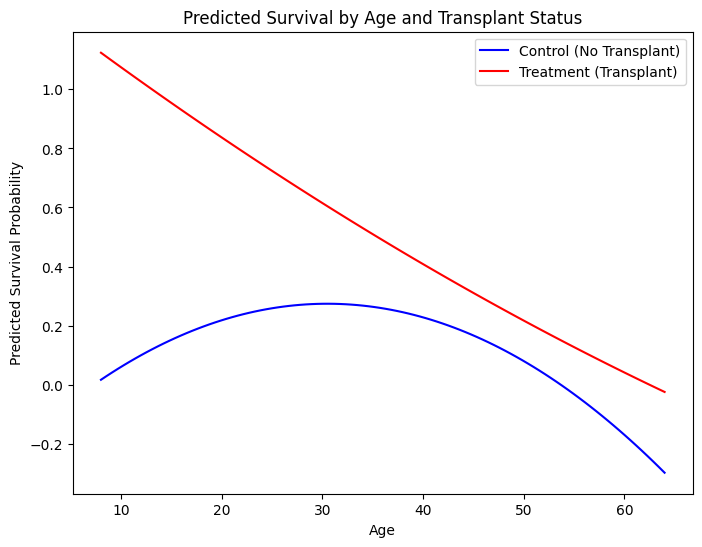

In [12]:
# Create a grid of ages for plotting
ages = np.linspace(df['age'].min(), df['age'].max(), 100)

# Prepare a DataFrame for control predictions
df_plot_control = pd.DataFrame({
    'transplant_dummy': 0,
    'age': ages,
    'age_sq': ages**2,
    'transplant_age': 0 * ages,
    'transplant_age_sq': 0 * (ages**2),
})
X_plot_control = sm.add_constant(df_plot_control, has_constant='add')
df_plot_control['pred_control'] = model.predict(X_plot_control)

# Prepare a DataFrame for treatment predictions
df_plot_treatment = pd.DataFrame({
    'transplant_dummy': 1,
    'age': ages,
    'age_sq': ages**2,
    'transplant_age': 1 * ages,
    'transplant_age_sq': 1 * (ages**2),
})
X_plot_treatment = sm.add_constant(df_plot_treatment, has_constant='add')
df_plot_treatment['pred_treatment'] = model.predict(X_plot_treatment)

# Plot the two curves
plt.figure(figsize=(8, 6))
plt.plot(ages, df_plot_control['pred_control'], label='Control (No Transplant)', color='blue')
plt.plot(ages, df_plot_treatment['pred_treatment'], label='Treatment (Transplant)', color='red')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival by Age and Transplant Status')
plt.legend()
plt.show()


The model indicates that the transplant group is predicted to survive at higher rates than the control group across the age range, but the absolute predictions themselves should be interpreted with caution. The control group has an inverted U-curve which implies that for younger patients and older patients, the model predicts lower probabilities of survival, peaking somewhere around middle age. The treatment curve starts above 1 for younger ages and decreases with age, exceeding realistic probability bounds for a binary outcome. Although the flexible model captures some patterns, it can produce invalid probabilites such as ones above 1 or below 0. 

There are concerns with the validity of the modeling approach becasue of bounded outcomes and correlational models. If the model is correlational, it may not accurately capture the causal effect of a transplant. Patients with certain characteristics might appear to have worse outcomes because they are sicker, not because a transplant would help. Additionally, the large-scale data usage for modeling can raise privacy issues. Patients need to understand how their data is being used. Finally, if the training data does not represent the full patient population (socioeconomic status, ethnicities, etc) the model can systematically disadvantage those groups. This can lead to algorithmic bias where historical inequities in healthcare data can be perpetuated in the model. 